In [ ]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [ ]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_3(Linear%20Regression)/kc_house_data.csv")

In [ ]:
# the number of rows and columns
df.shape

(21613, 21)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_copy= df

In [ ]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [ ]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Count the values with .5 in 'bathrooms' column
bathrooms_count = df[df['bathrooms'] % 1 == 0.5].shape[0]

# Count the values with .5 in 'floors' column
floors_count = df[df['floors'] % 1 == 0.5].shape[0]

# Print the counts
print("Count of values with .5 in 'bathrooms':", bathrooms_count)
print("Count of values with .5 in 'floors':", floors_count)

Count of values with .5 in 'bathrooms': 7674
Count of values with .5 in 'floors': 2079


The count provided above indicates a considerable quantity of bathrooms and floors with a decimal value of 0.5. Therefore, I will maintain these values without making any changes.

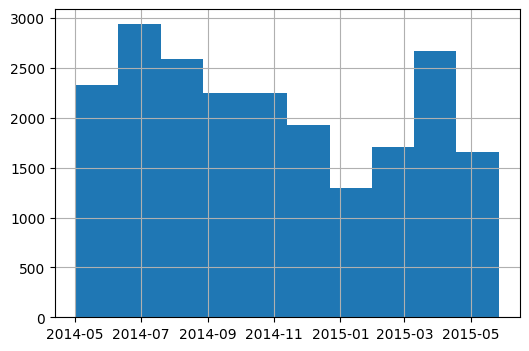

In [ ]:
df['date'].hist(figsize = (6,4))
plt.show()

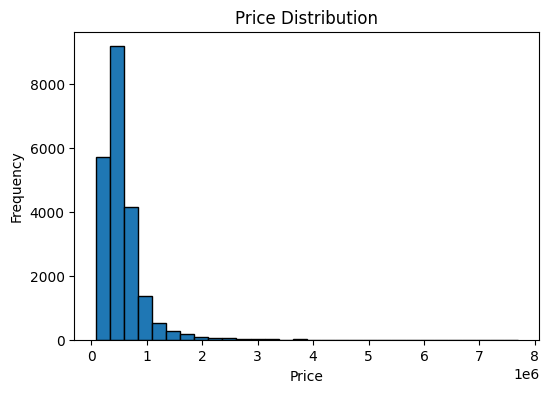

In [ ]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

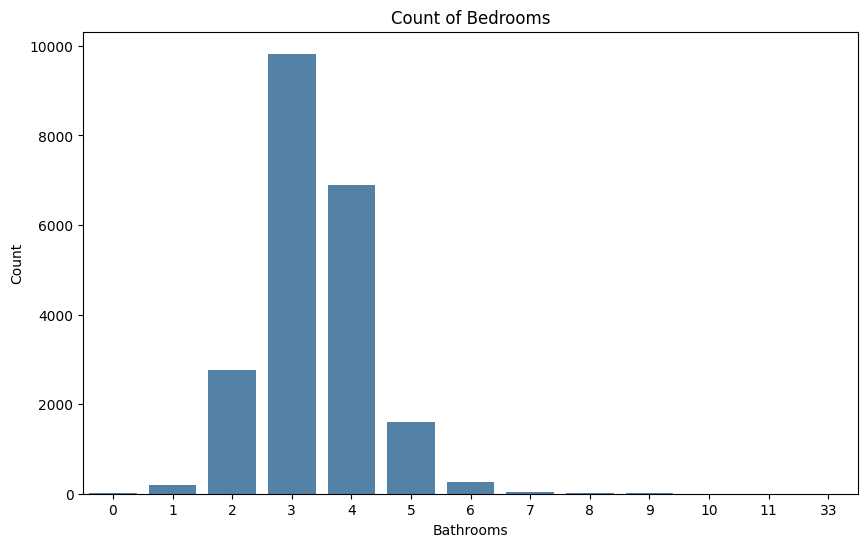

In [ ]:
bedroom_counts = df['bedrooms'].value_counts()

# Create a bar plot of bathroom counts
plt.figure(figsize=(10, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='steelblue')

# Set plot title and labels
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

# Show plot
plt.show()

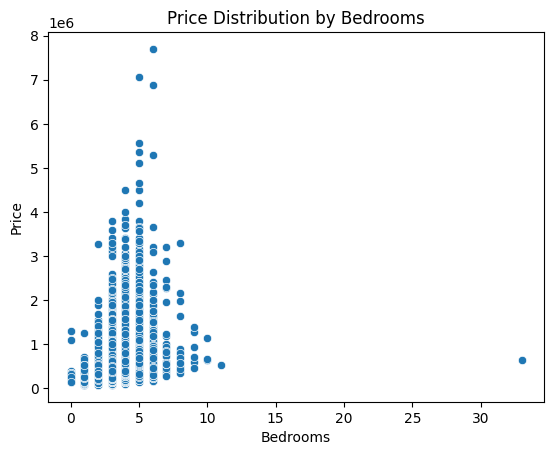

In [ ]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

We will examine the data to identify bedrooms with a quantity greater than 10.

In [ ]:
df[(df['bedrooms'] >= 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [ ]:
df_copy= df[(df['zipcode'] == 98103)]

In [ ]:
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


Typically, the number of bedrooms in this area is three. It is evident that there is not a substantial difference in house prices between properties with 33 bedrooms and other houses in the same area. This suggests that there may be an error in the data entry.

In [ ]:
df = df.drop(df[df['bedrooms'] == 33].index)


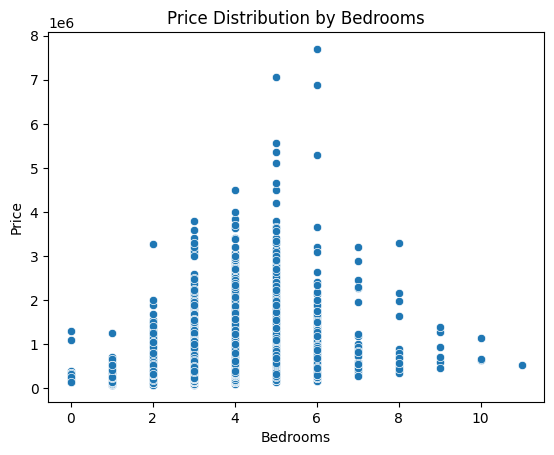

In [ ]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

FIX !

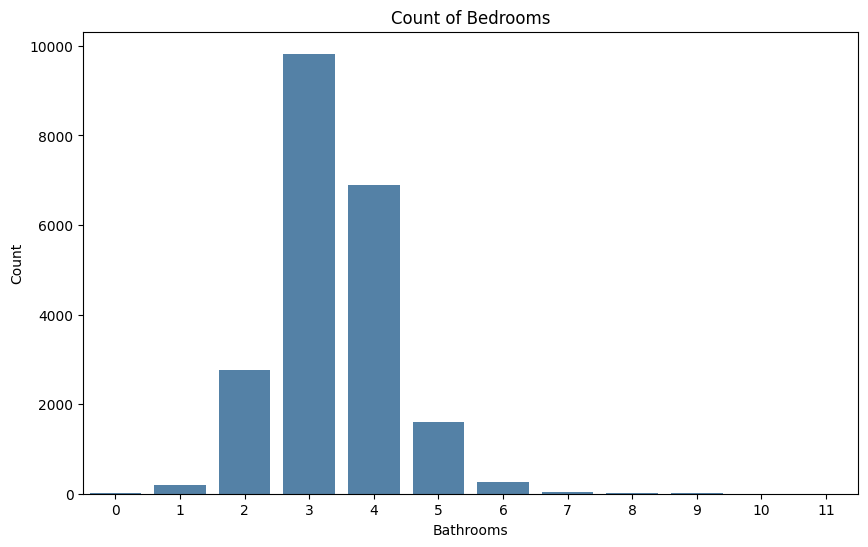

In [ ]:
bedroom_counts = df['bedrooms'].value_counts()

# Create a bar plot of bathroom counts
plt.figure(figsize=(10, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='steelblue')

# Set plot title and labels
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

# Show plot
plt.show()

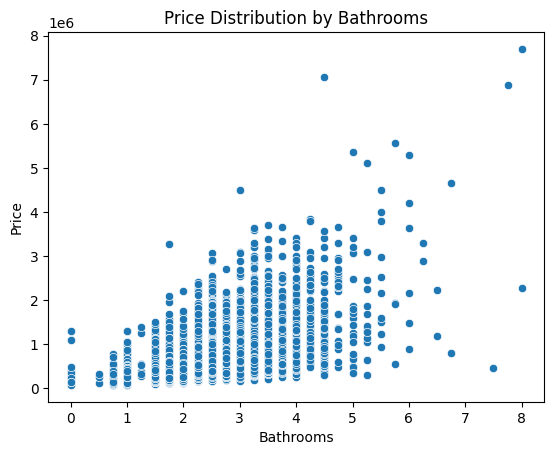

In [ ]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

In [ ]:
df[(df['bathrooms'] >= 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [ ]:
df = df.drop(df[df['bathrooms'] >= 7].index)


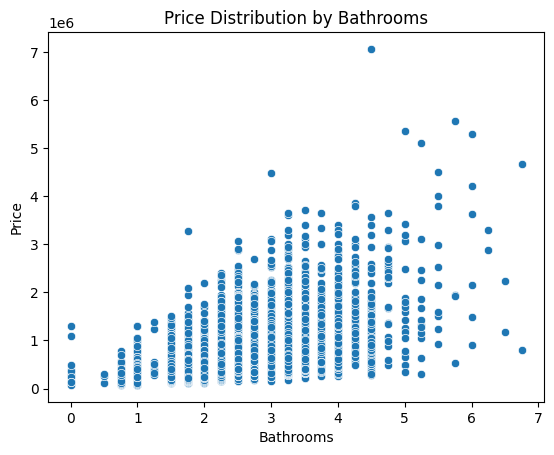

In [ ]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

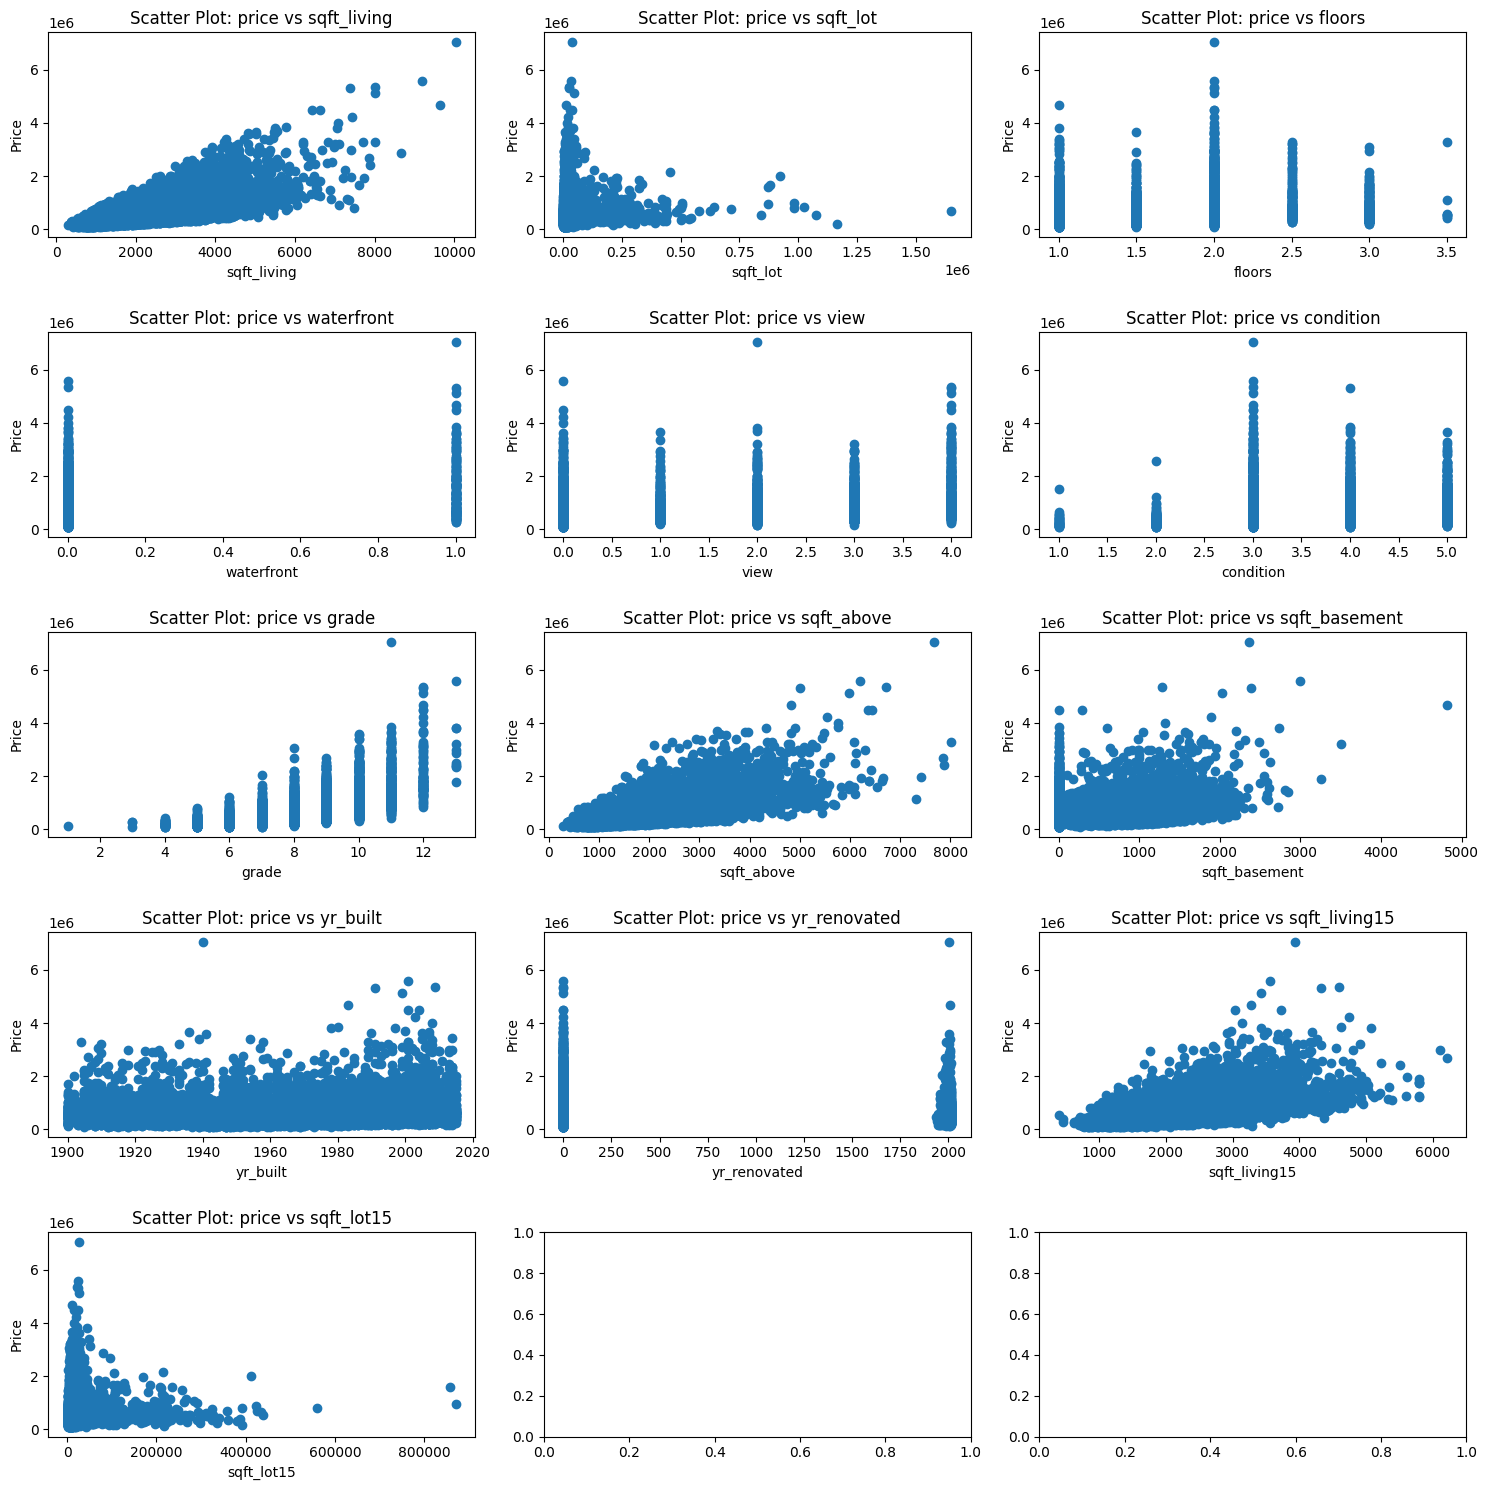

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()


<Axes: >

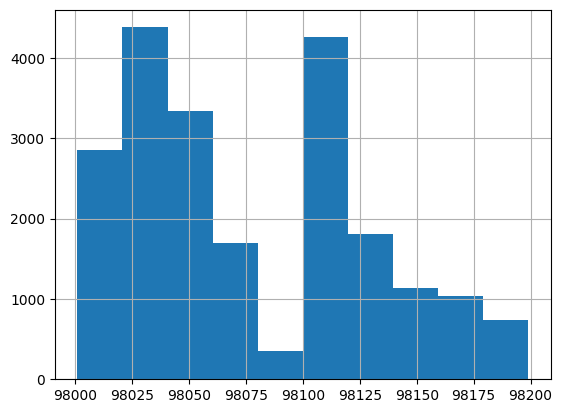

In [ ]:
df["zipcode"].hist()

<Axes: xlabel='lat', ylabel='long'>

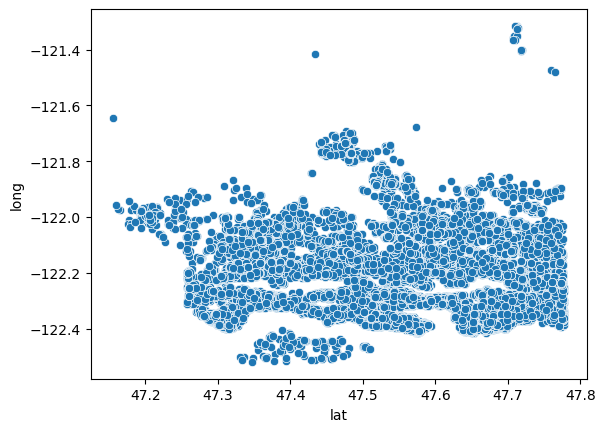

In [ ]:
sns.scatterplot(data = df, x = "lat", y = "long")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21608 non-null  int64         
 1   date           21608 non-null  datetime64[ns]
 2   price          21608 non-null  float64       
 3   bedrooms       21608 non-null  int64         
 4   bathrooms      21608 non-null  float64       
 5   sqft_living    21608 non-null  int64         
 6   sqft_lot       21608 non-null  int64         
 7   floors         21608 non-null  float64       
 8   waterfront     21608 non-null  int64         
 9   view           21608 non-null  int64         
 10  condition      21608 non-null  int64         
 11  grade          21608 non-null  int64         
 12  sqft_above     21608 non-null  int64         
 13  sqft_basement  21608 non-null  int64         
 14  yr_built       21608 non-null  int64         
 15  yr_renovated   21608 non

The overall data appears to follow a normal distribution. To remove outliers from specific columns, we can utilize the z-score method.

In [ ]:
def remove_outliers(df):
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [ ]:
# Apply function to df
df = remove_outliers(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19772 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19772 non-null  int64         
 1   date           19772 non-null  datetime64[ns]
 2   price          19772 non-null  float64       
 3   bedrooms       19772 non-null  int64         
 4   bathrooms      19772 non-null  float64       
 5   sqft_living    19772 non-null  int64         
 6   sqft_lot       19772 non-null  int64         
 7   floors         19772 non-null  float64       
 8   waterfront     19772 non-null  int64         
 9   view           19772 non-null  int64         
 10  condition      19772 non-null  int64         
 11  grade          19772 non-null  int64         
 12  sqft_above     19772 non-null  int64         
 13  sqft_basement  19772 non-null  int64         
 14  yr_built       19772 non-null  int64         
 15  yr_renovated   19772 non

In [ ]:
((21608-19772)/21608)*100

8.496853017400962

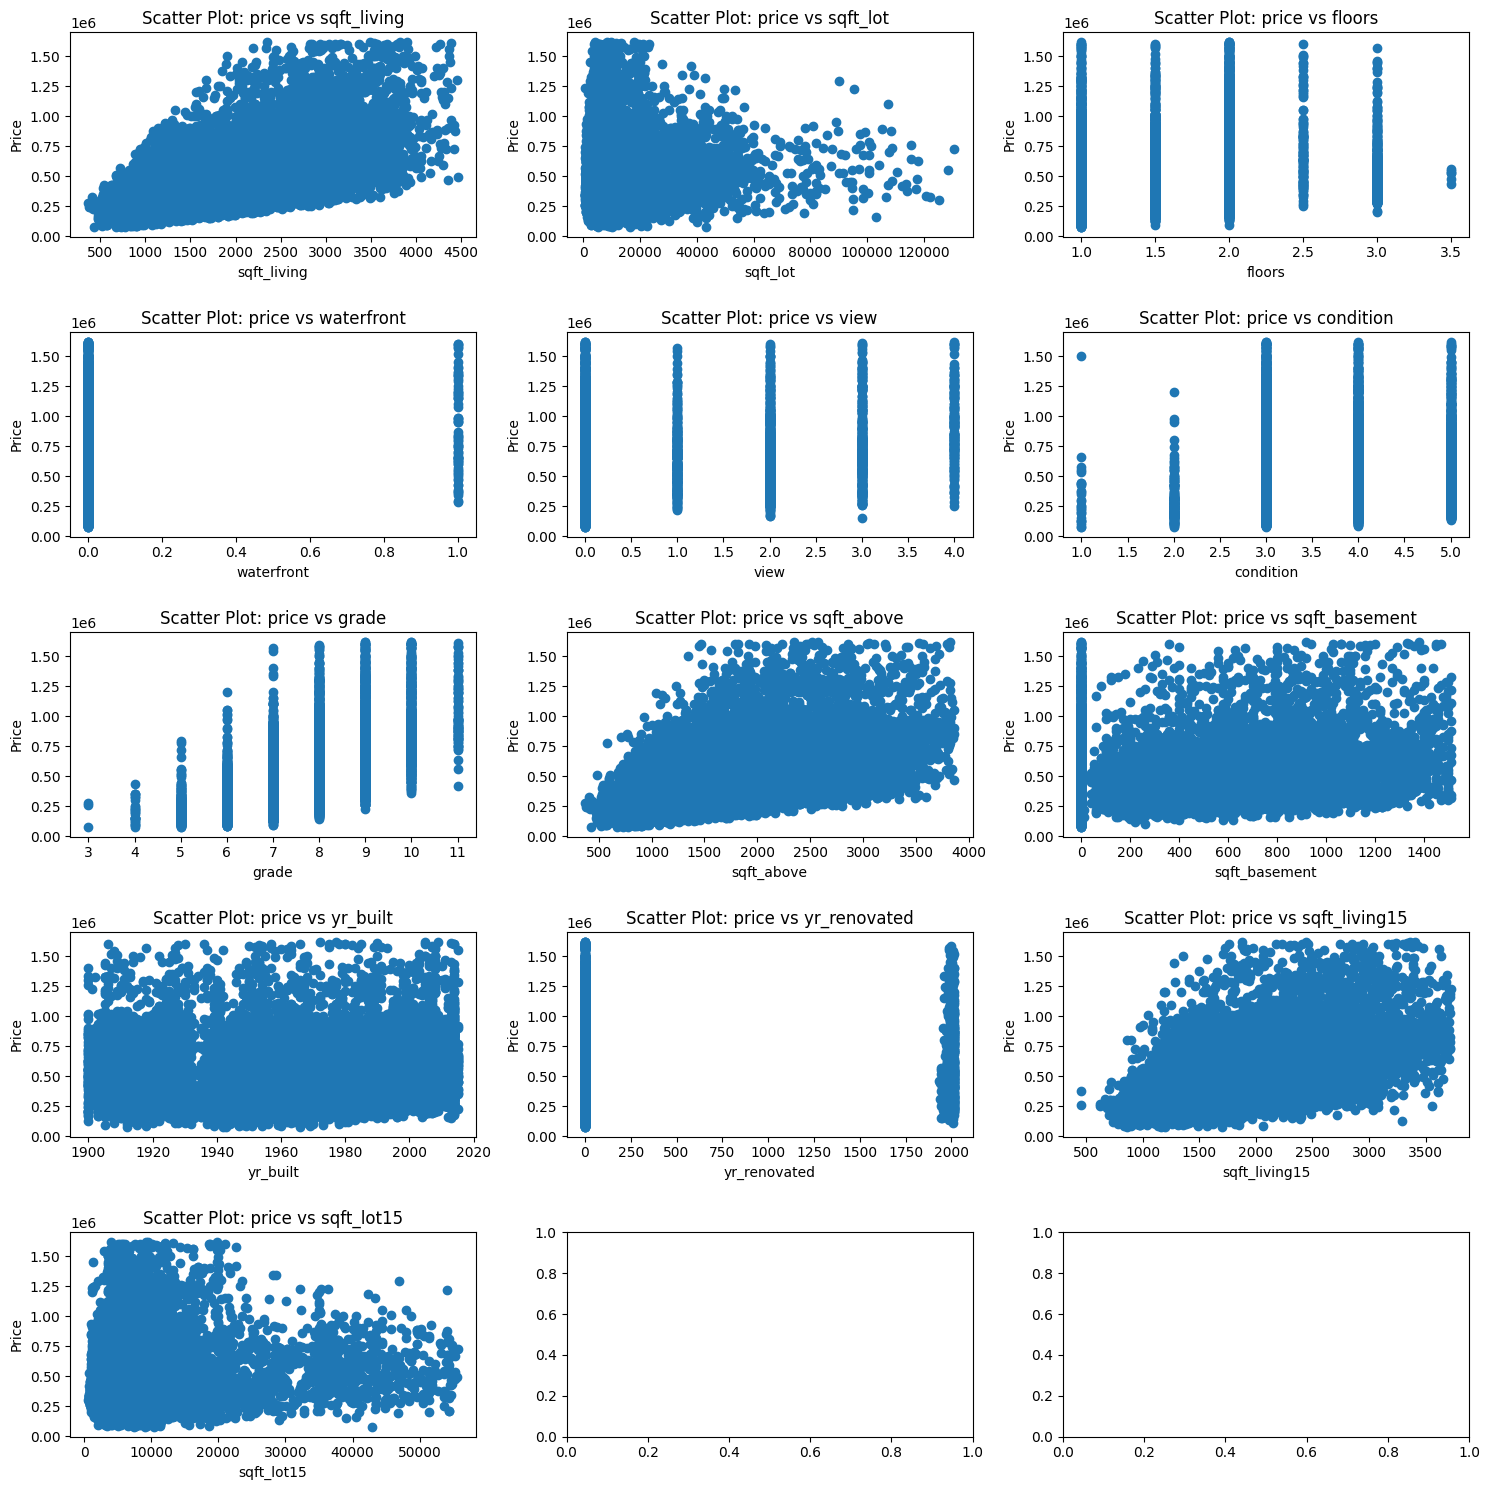

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()

In [ ]:
df[(df['sqft_basement'] <= 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df['price_per_sqft'] = df.groupby('zipcode')['price'].transform(lambda x: x / df['sqft_living'])


In [ ]:
df['month'] = df['date'].dt.month

In [ ]:
df['Year'] = df['date'].dt.year

In [ ]:
# Calculate the age of the house and create a new variable 'house_age'
df['house_age'] = (df['Year'] - df['yr_built'])

Not a good idea

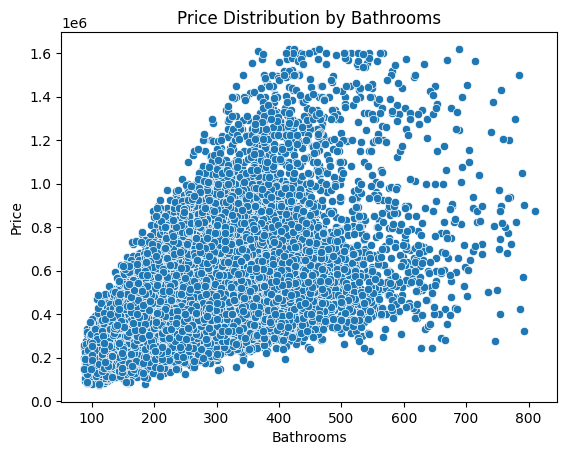

In [ ]:
# Create a box plot
sns.scatterplot(data = df,x='price_per_sqft', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

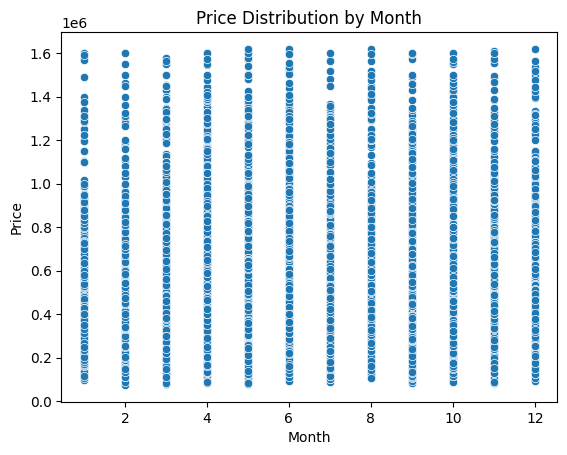

In [ ]:
# Create a box plot
sns.scatterplot(data = df,x='month', y='price')
# Set labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Distribution by Month')

# Display the plot
plt.show()

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

In [ ]:
X.drop(columns=['date','id'], inplace=True)

C:\Users\supra\AppData\Local\Temp\ipykernel_7656\3338808530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19772 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        19772 non-null  int64  
 1   bathrooms       19772 non-null  float64
 2   sqft_living     19772 non-null  int64  
 3   sqft_lot        19772 non-null  int64  
 4   floors          19772 non-null  float64
 5   waterfront      19772 non-null  int64  
 6   view            19772 non-null  int64  
 7   condition       19772 non-null  int64  
 8   grade           19772 non-null  int64  
 9   sqft_above      19772 non-null  int64  
 10  sqft_basement   19772 non-null  int64  
 11  yr_built        19772 non-null  int64  
 12  yr_renovated    19772 non-null  int64  
 13  zipcode         19772 non-null  int64  
 14  lat             19772 non-null  float64
 15  long            19772 non-null  float64
 16  sqft_living15   19772 non-null  int64  
 17  sqft_lot15      19772 non-null  int6

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression()

In [ ]:
y_pred= regressor.predict(X_test)#predicting the value of dependent variables with the help of independent variable


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))


70427.15431724585

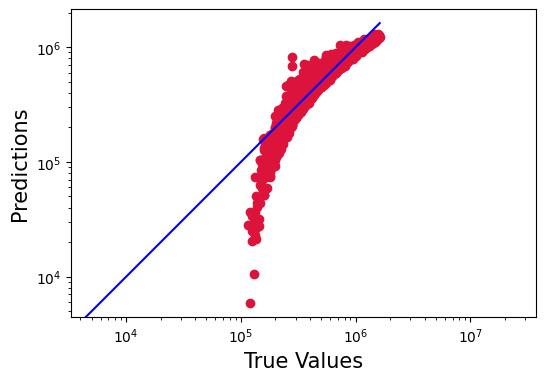

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

X.drop(columns=['date','id'], inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

C:\Users\supra\AppData\Local\Temp\ipykernel_7656\3863675006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


In [ ]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + waterfront +view + condition + grade + sqft_above + sqft_basement + yr_renovated + zipcode + lat + long + sqft_living15 + price_per_sqft + house_age ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.350e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:20:07   Log-Likelihood:            -2.4887e+05
No. Observations:               19772   AIC:                         4.978e+05
Df Residuals:                   19756   BIC:                         4.979e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.126e+06   1.04e+06      3.

In [ ]:
y_pred = results.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

70300.59130681198

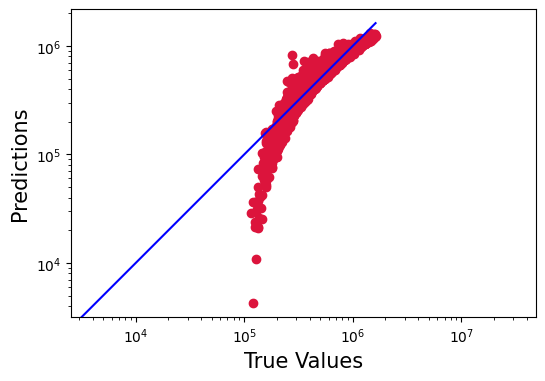

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

X.drop(columns=['date','id'], inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

C:\Users\supra\AppData\Local\Temp\ipykernel_7656\3863675006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)


In [ ]:
clf.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

70425.42300283686

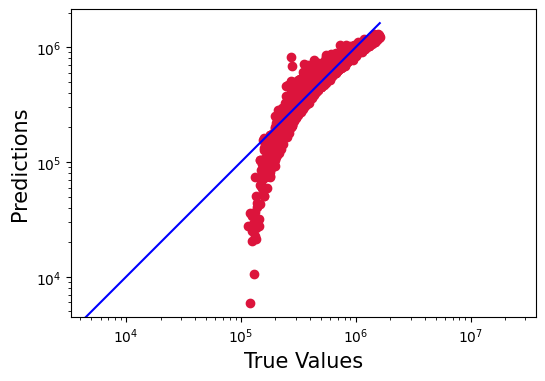

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

X.drop(columns=['date','id'], inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

C:\Users\supra\AppData\Local\Temp\ipykernel_7656\3863675006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


In [ ]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.743e+13, tolerance: 8.892e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

70426.91080878176

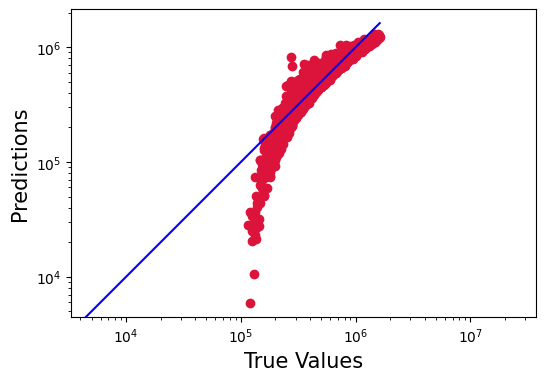

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

X.drop(columns=['date','id'], inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

C:\Users\supra\AppData\Local\Temp\ipykernel_7656\3863675006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


In [ ]:
# define model
modell = ElasticNet(alpha=1.0, l1_ratio=0.5)
modell.fit(X_train, y_train)
y_pred= modell.predict(X_test)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.222e+13, tolerance: 8.892e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

71617.6159776703

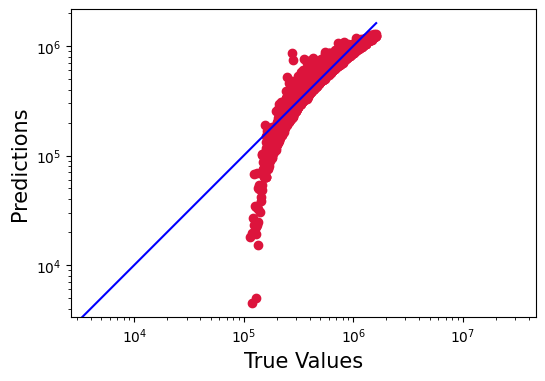

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

X.drop(columns=['date','id'], inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

C:\Users\supra\AppData\Local\Temp\ipykernel_7656\3863675006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date','id'], inplace=True)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly_regressor=PolynomialFeatures(degree=4)#we can hit and try with the degree to make the curve accurate
X_poly=poly_regressor.fit_transform(X_train)
poly_regressor.fit(X_poly,y_train)

In [ ]:
regressor2=LinearRegression()
regressor2.fit(X_poly,y_train)

In [ ]:
# visualising the data with polynomial data
X_grid=np.arange(min(X),max(X),0.1)#to enhance the curve line 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y,color='red')
plt.plot(X_grid,regressor2.predict(poly_regressor.fit_transform(X_grid)),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salaries')